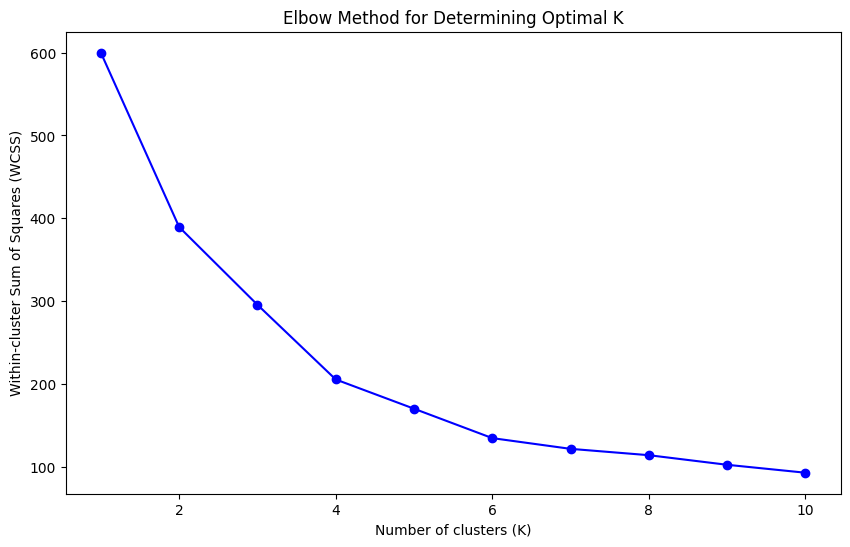

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)  \
0           1    Male   19                  15                      39   
1           2    Male   21                  15                      81   
2           3  Female   20                  16                       6   
3           4  Female   23                  16                      77   
4           5  Female   31                  17                      40   

   Cluster  
0        2  
1        2  
2        3  
3        2  
4        2  


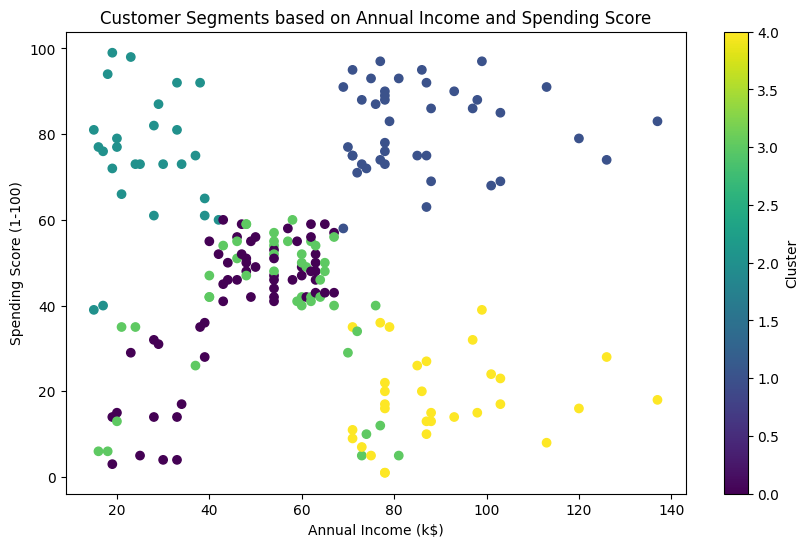

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Step 1: Load the dataset
file_path = 'Mall_Customers.csv'  # Replace with the correct path to your CSV file
data = pd.read_csv(file_path)

# Step 2: Select relevant features
features = data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

# Step 3: Normalize the data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Step 4: Determine the optimal number of clusters using the elbow method
wcss = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(10, 6))
plt.plot(K_range, wcss, marker='o', linestyle='-', color='b')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Within-cluster Sum of Squares (WCSS)')
plt.title('Elbow Method for Determining Optimal K')
plt.show()

# Step 5: Apply K-means clustering with the chosen number of clusters (K = 5)
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(scaled_features)

# Add cluster labels to the original data
data['Cluster'] = clusters

# Display the first few rows of the data with cluster labels
print(data.head())

# Step 6: Analyze the results
# Visualize the clusters
plt.figure(figsize=(10, 6))
plt.scatter(data['Annual Income (k$)'], data['Spending Score (1-100)'], c=data['Cluster'], cmap='viridis')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Customer Segments based on Annual Income and Spending Score')
plt.colorbar(label='Cluster')
plt.show()